# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [393]:
# Import diabetes dataset
df = pd.read_csv('diabetes.csv')
df_raw = df.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [394]:
df.shape

(768, 9)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [396]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [397]:
# Check missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [398]:
# Check 0 values
(df ==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [399]:
# Replace 0 values in Glucose column with median
df['Glucose'].replace(0, df['Glucose'].mean(), inplace = True)

# Replace 0 values in BloodPressure column with median
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace = True)

# Replace 0 values in SkinThickness column with median
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace = True)

# Replace 0 values in Insulin column with median
df['Insulin'].replace(0, df['Insulin'].median(), inplace = True)

# Replace 0 values in BMI column with median
df['BMI'].replace(0, df['BMI'].mean(), inplace = True)


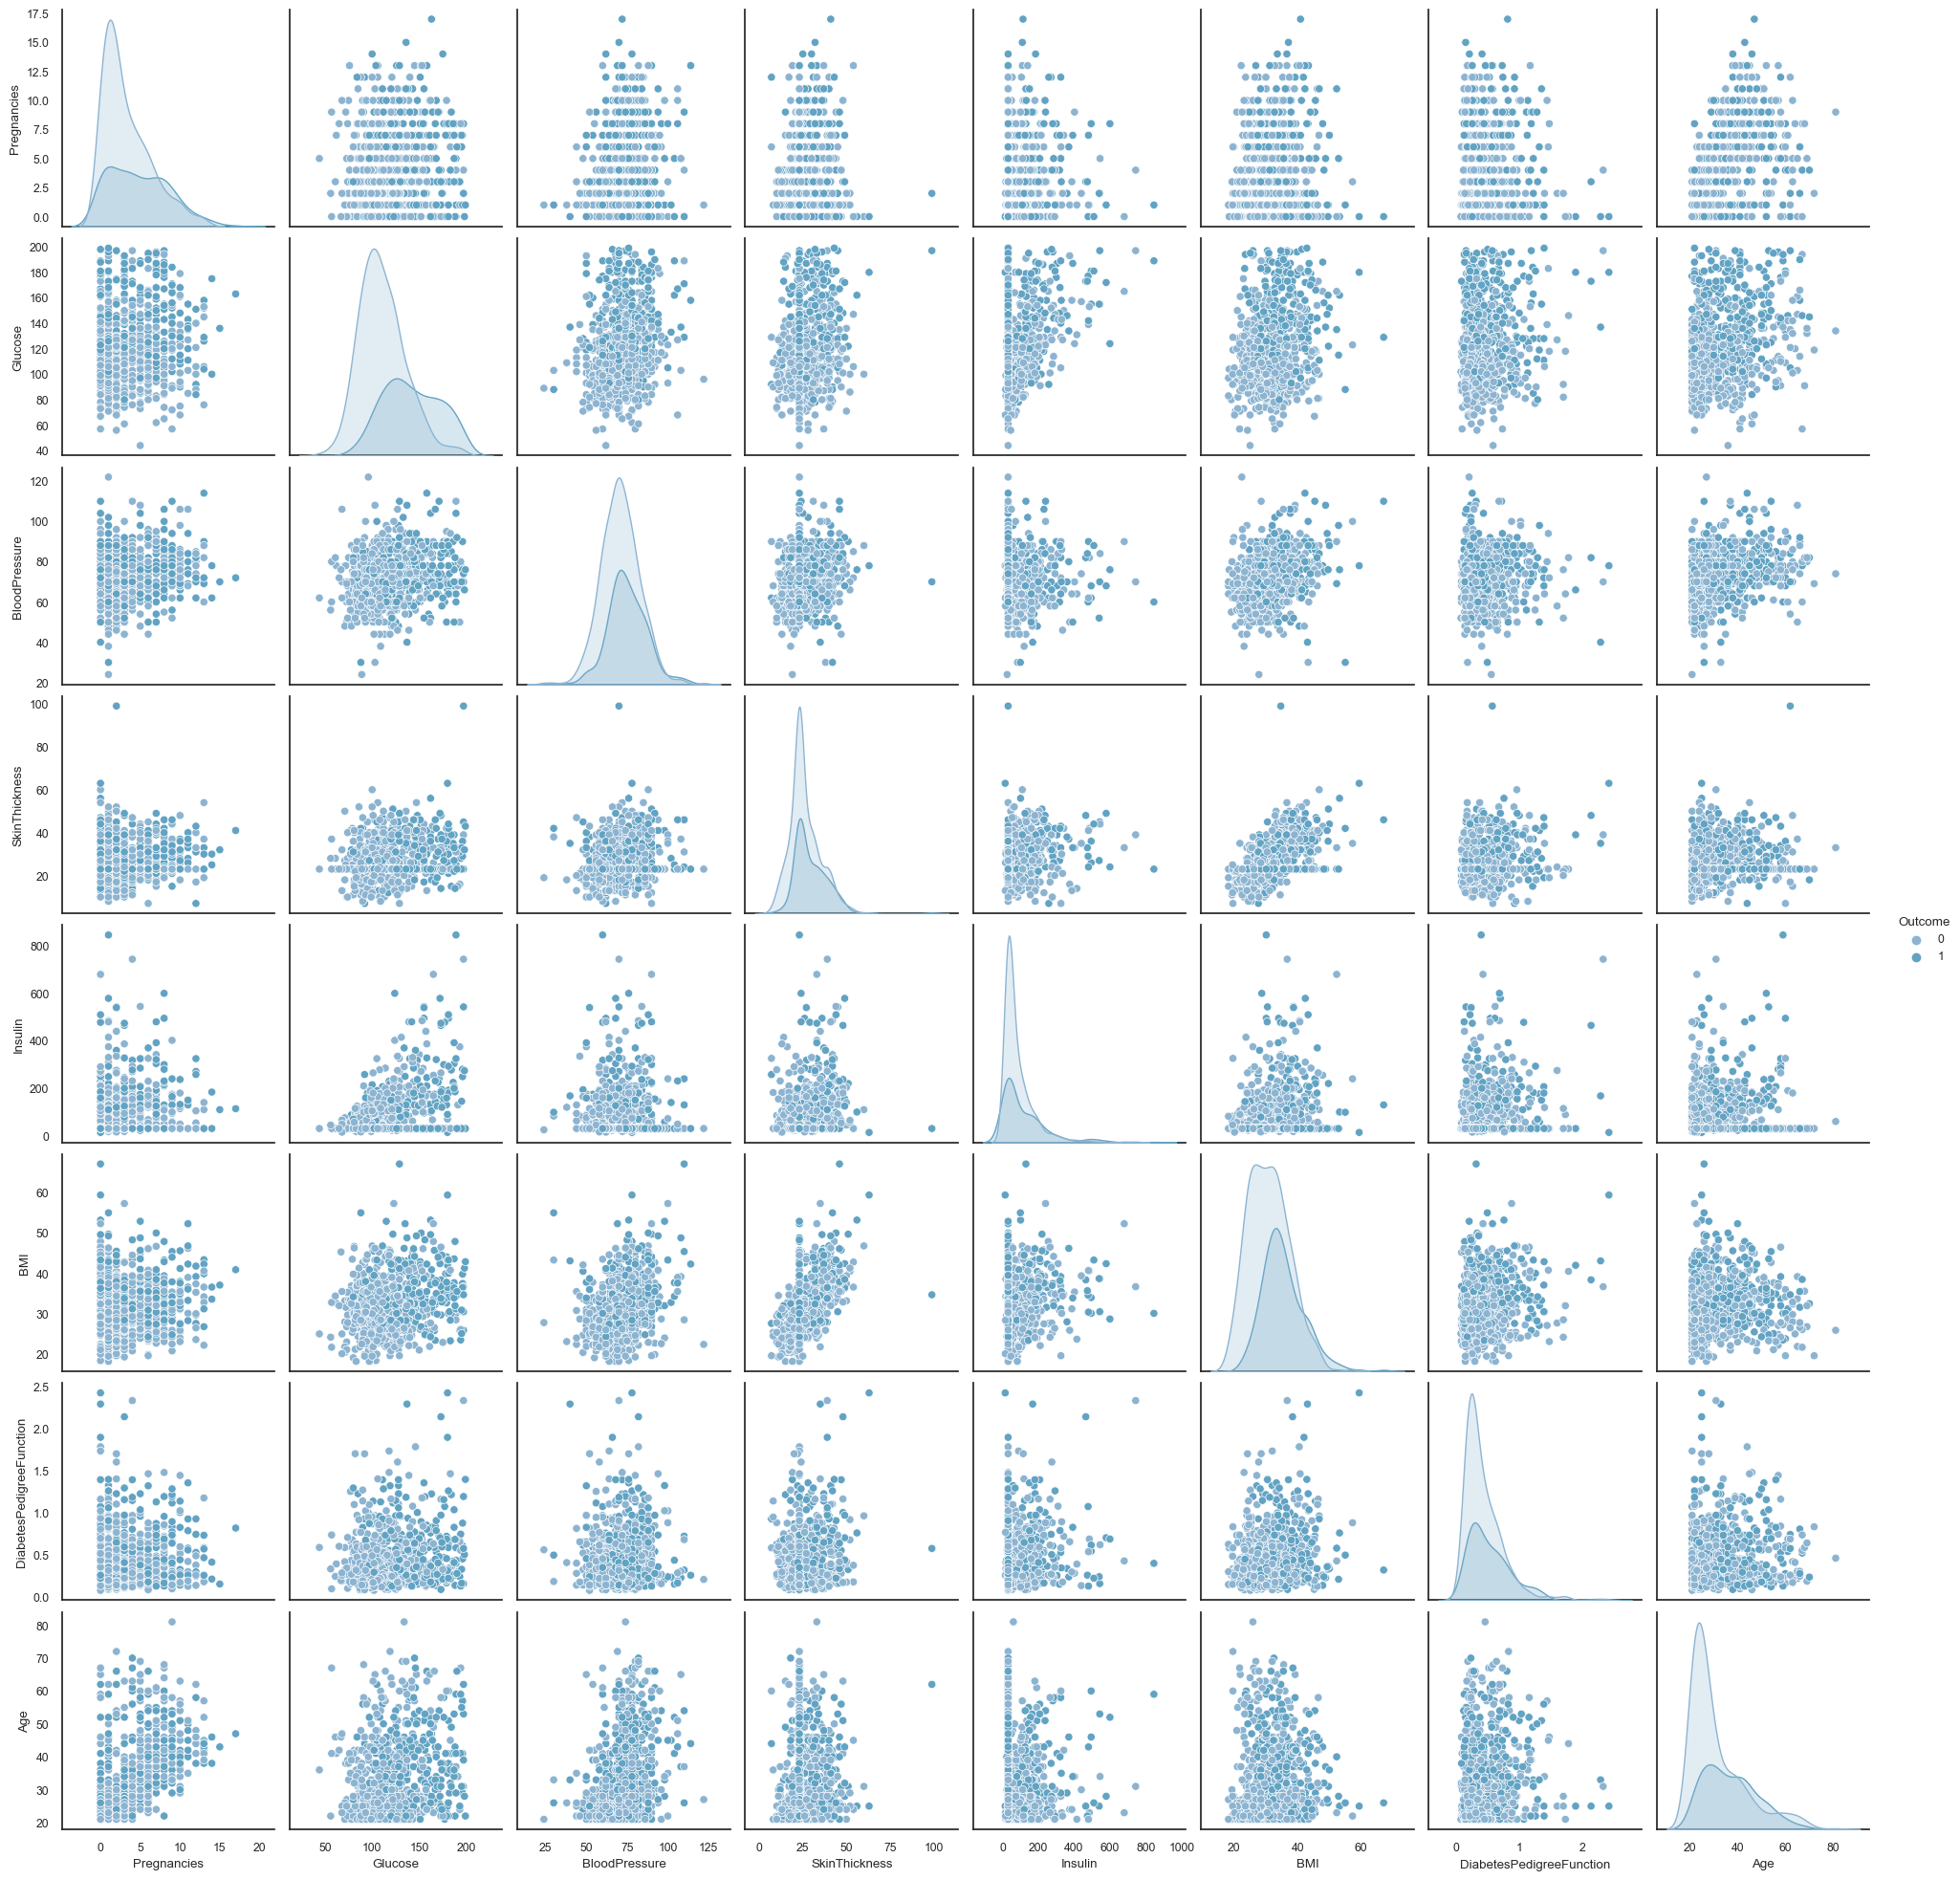

In [400]:
# Plotting pairwise relationships in a dataset
sns.pairplot(df,hue ='Outcome')
plt.show()

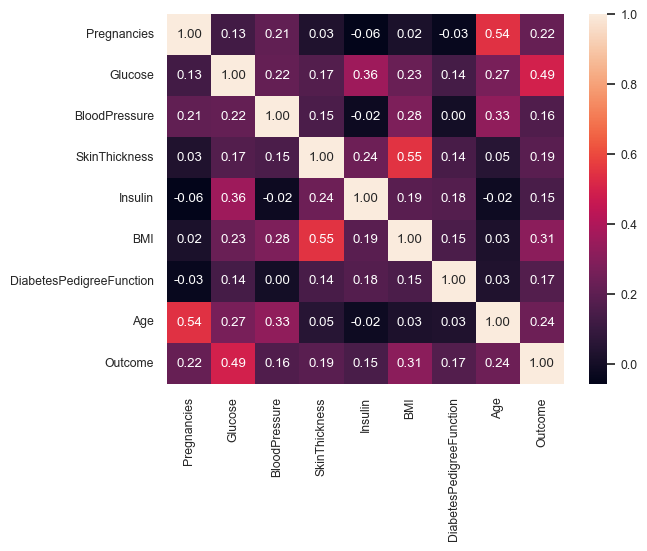

In [401]:
# Compute correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

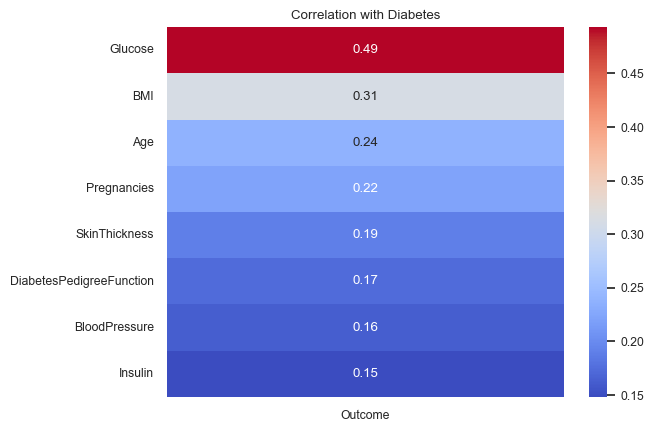

In [402]:
# The predictor variables related to the outcome variable
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

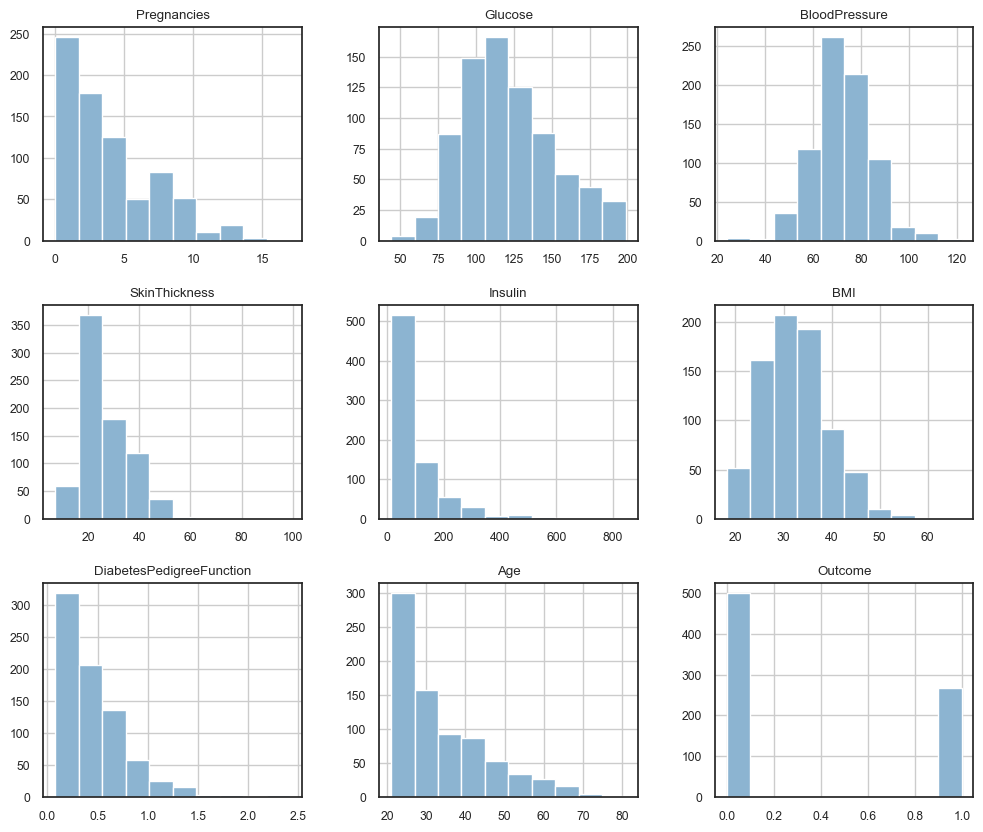

In [403]:
# Distribution of Each Predictor Variable
# Using histograms
df.hist(figsize=(12,10))
plt.show()

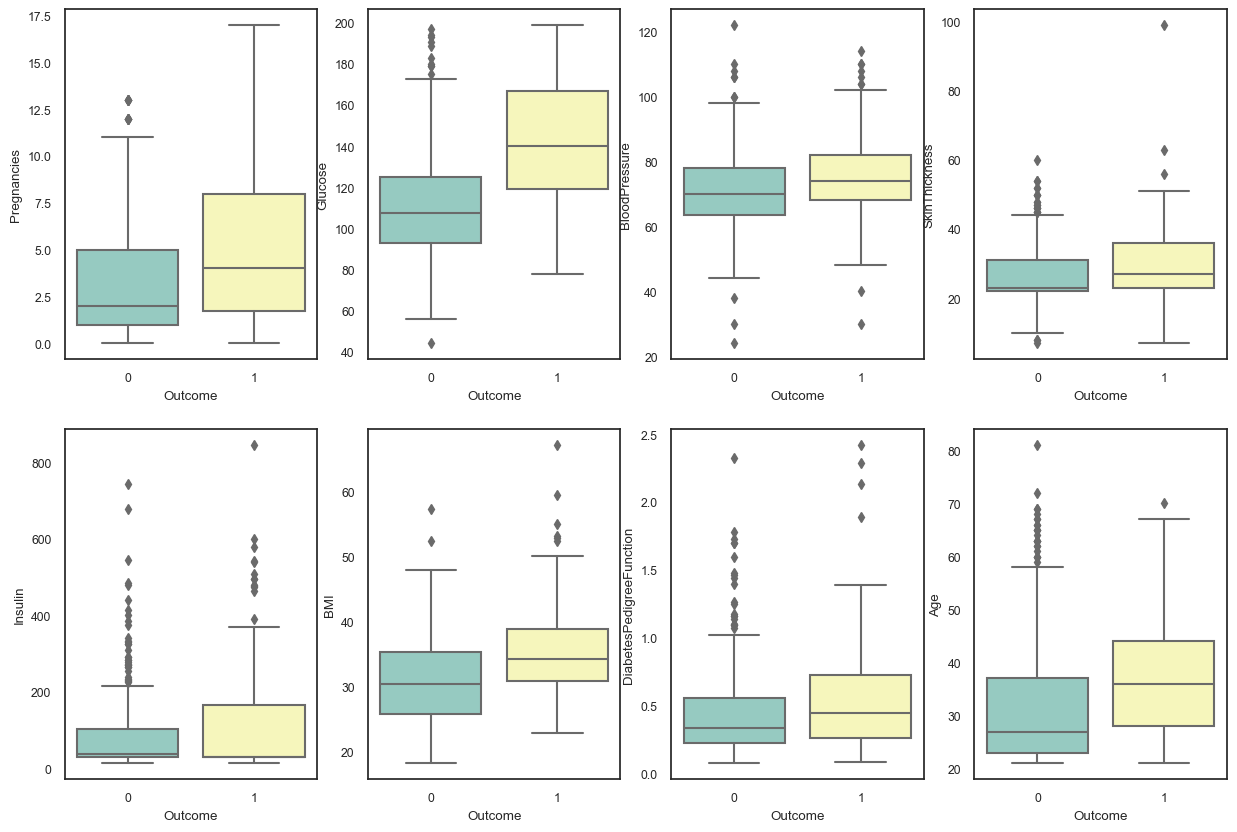

In [404]:
# Check outlier
# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Generate a boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x="Outcome", y=feature, data=df, ax=axes[i//4, i%4], palette="Set3")

In [405]:
# Average Age
avg_age = df['Age'].mean()
avg_age

33.240885416666664

In [406]:
# Average Glucose Level and BMI for Individuals with/without Diabetes

avg_values = df.groupby('Outcome')[['Glucose', 'BMI']].mean()
avg_values

,Glucose,BMI
Outcome,,
0,110.705367,30.880066
1,142.159661,35.381288


Analysis Summary:
Our data analysis reveals intricate relationships among BMI, Pregnancies, Glucose and Age in determining diabetes risk.

BMI's Role: A lower BMI, coupled with fewer pregnancies, reduced glucose levels, and younger age, is associated with a lower diabetes risk.
Conversely, an increased BMI, especially beyond 40, elevates the diabetes risk, even with lower pregnancy counts. Thus, BMI might be a pivotal factor in diabetes onset.

Glucose's Influence: Higher glucose levels significantly heighten diabetes risk, overriding lower BMI or younger age effects. The glucose factor stands out in its contribution to diabetes prevalence.

Age and Pregnancies Interplay: Age and pregnancies showcase a comparable influence on diabetes. However, age slightly edges out with older individuals showing a higher diabetes prevalence.

# Part II : Preprocessing & Feature Engineering

In [419]:
from sklearn.preprocessing import StandardScaler

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

Handling missing values

In [408]:
# Check 0 values
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [409]:
# Check  missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [410]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Handling outliers

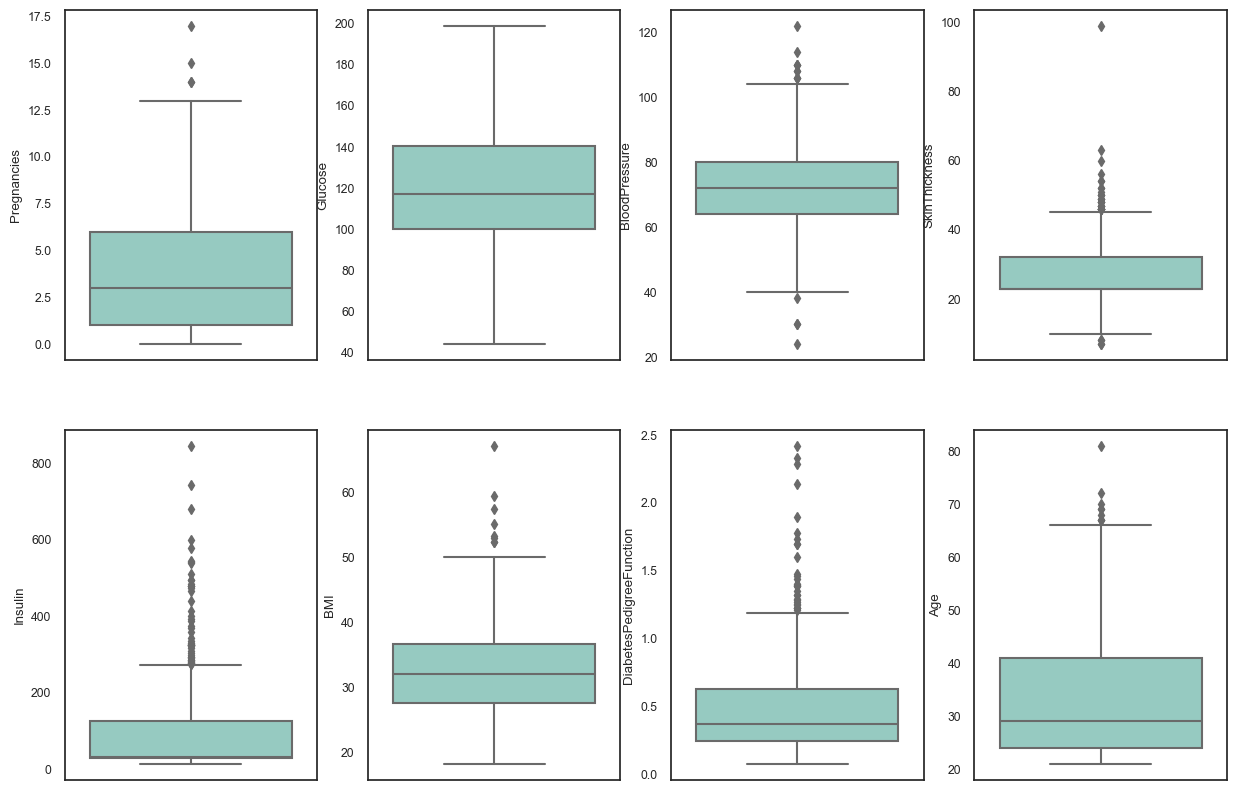

In [411]:
# Use boxplot show Outliers
# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Generate a boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=feature, data=df, ax=axes[i//4, i%4], palette="Set3")

These outliers still make sense. Temporarily keep it here. After doing the transform and model, if model is not good enough, come back here to remove it

In [412]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df[features] .head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549899,5.484909,-0.020496


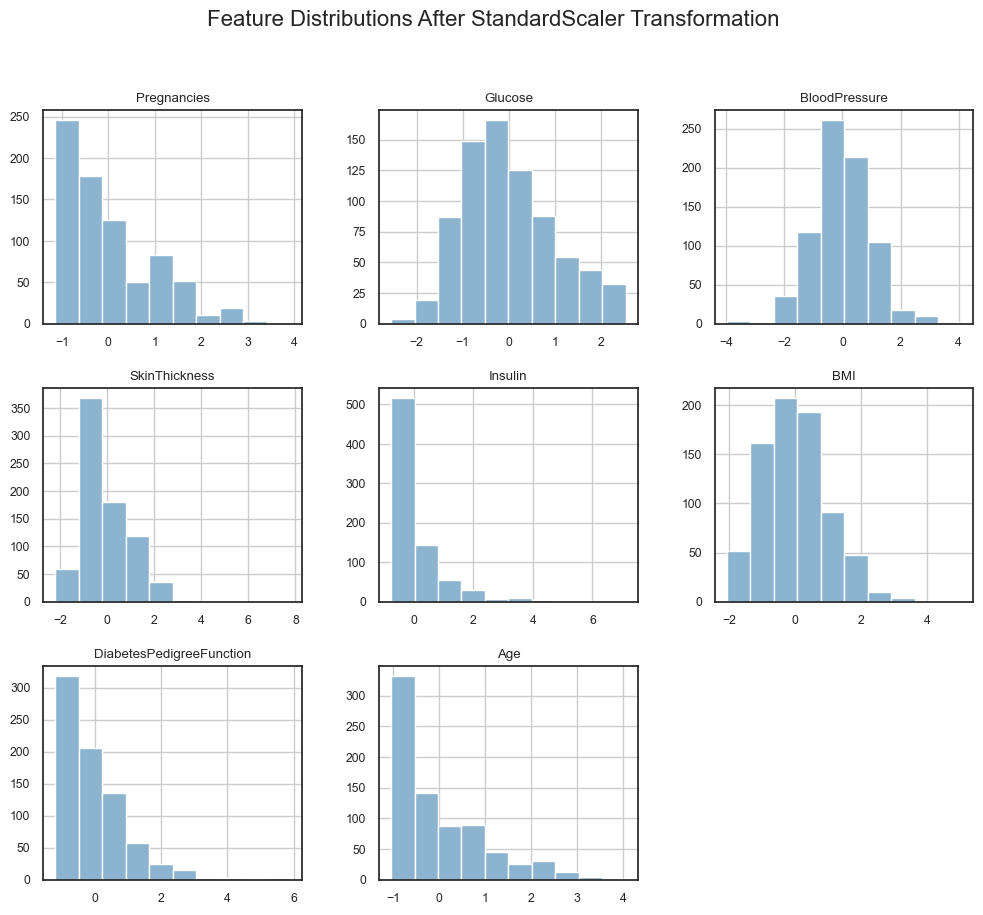

In [413]:
# Checking the data distribution
df[features].hist(figsize=(12,10))
plt.suptitle("Feature Distributions After StandardScaler Transformation", fontsize=16)
plt.show()

Check imbalanced data

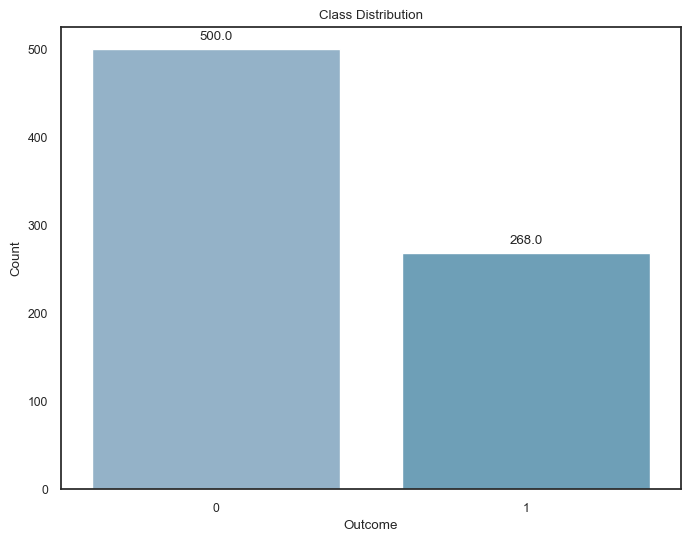

In [414]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Add counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

Out data is imbalanced and 2 common machine learning models that can handle imbalanced data effectively are Random Forest and XGBoost

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [415]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167255,0.468492,1.425995,1
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851535,-0.365061,-0.190672,0
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331821,0.604397,-0.105584,1
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633222,-0.920763,-1.041549,0
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549899,5.484909,-0.020496,1


In [416]:
# Apply Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, f1_score

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameter grid for Random Forest
rf_param_grid = {'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 150], 'max_depth': [None, 5, 10, 15, 20, 25, 30], 'class_weight': ['balanced']}

# Instantiate Random Forest model
rf = RandomForestClassifier(random_state= 42)

# Set up GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for Random Forest: ", grid_search.best_params_)
print("Best estimator for Random Forest: ", grid_search.best_estimator_)

# Predict and evaluate the model
y_pred = grid_search.best_estimator_.predict(X_test)

print("roc_auc_score for Random Forest: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters for Random Forest:  {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 70}
Best estimator for Random Forest:  RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=70,
                       random_state=42)
roc_auc_score for Random Forest:  0.787878787878788
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        99
           1       0.65      0.82      0.73        55

    accuracy                           0.78       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.80      0.78      0.78       154



In [418]:
# Apply XGBoost with GridSearch
# Set up parameter grid for XGBoost
xgb_param_grid = { 'n_estimators': [20,30,40,50,60,70,80,90,100, 150], 'max_depth':[None, 5, 10, 15, 20, 25, 30] , 'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.7, 0.9, 1.0]}

# Instantiate XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Set up GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for XGBoost: ", xgb_grid_search.best_params_)

# Predict and evaluate the model
y_pred = xgb_grid_search.best_estimator_.predict(X_test)

print("ROC AUC Score for XGBoost: ", roc_auc_score(y_test, y_pred))
print("Classification Report for XGBoost: ")
print(classification_report(y_test, y_pred))
print("Best estimator for XGBoost: ", xgb_grid_search.best_estimator_)

Best Parameters for XGBoost:  {'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 20, 'subsample': 0.7}
ROC AUC Score for XGBoost:  0.7444444444444445
Classification Report for XGBoost: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Best estimator for XGBoost:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_thr

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Random Forest Model:
- Parameters:

    - class_weight: 'balanced'
    - max_depth: 5
    - n_estimators: 70
- Performance Metrics:

    - ROC AUC Score: 0.7879
    - Precision for Class 1 (diabetes): 0.65
    - Recall for Class 1 (diabetes): 0.82
    - F1-score for Class 1 (diabetes): 0.73
    - Accuracy: 0.78

- Overall Performance:

    - Higher ROC AUC score.
    - Lower precision but higher recall for the positive class (diabetes).
    - Balanced handling of both classes due to the balanced class weight.

XGBoost Model:
- Parameters:

    - learning_rate: 0.2
    - max_depth: None (not limited)
    - n_estimators: 20
    - subsample: 0.7
- Performance Metrics:

    - ROC AUC Score: 0.7444
    - Precision for Class 1 (diabetes): 0.66
    - Recall for Class 1 (diabetes): 0.69
    - F1-score for Class 1 (diabetes): 0.67 (estimated)
    - Accuracy: 0.76
- Overall Performance:

    - Lower ROC AUC score.
    - Slightly higher precision but lower recall for the positive class (diabetes) compared to Random Forest
    - Potential for overfitting due to unlimited max depth

### Conclusion: 

- Model Performance: The Random Forest model has shown slightly superior performance compared to the XGBoost model

- Class Imbalance Handling: The balanced class weight in Random Forest helps in dealing with class imbalance

- Parameter Tuning: XGBoost with unlimited max depth can potentially lead to overfitting

- Final Recommendation for the Project: Considering the criticality of identifying diabetes cases (higher recall is often more desirable in healthcare scenarios to minimize false negatives), the Random Forest model might be a better choice for this specific case.